# Golf Final Project Airfoil Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import subprocess as sp

## Airfoil Generators

In [2]:
def generate_airfoil(length, x0, y0):
    C = .15

    a = np.sqrt((C-x0)**2+y0**2)

    zeta = np.linspace(0, 2*np.pi, length)
    epsilon_surf = x0 + a*np.cos(zeta)
    epsilon_surf = epsilon_surf + C**2*epsilon_surf/((x0+a*np.cos(zeta))**2+(y0+a*np.sin(zeta))**2)

    eta_surf = y0 + a*np.sin(zeta)
    eta_surf = eta_surf - C**2*eta_surf/((x0+a*np.cos(zeta))**2+(y0+a*np.sin(zeta))**2)
    
    return np.column_stack((epsilon_surf + 0.3,eta_surf))

In [3]:
def generate_NACA_airfoil():
    #
    # To Do
    #
    return airfoil

## Xfoil Interface

In [4]:
def read_airfoil(filename):
    file = open(filename,'r')
    lines = file.readlines()

    matrix = np.zeros((len(lines),2))

    n = 0
    for line in lines:
        if n != 0:
            tmp = line.strip()
            tmp = tmp.split(" ")
            matrix[n - 1][0], matrix[n - 1][1] = tmp[0], tmp[len(tmp)-1]
        n += 1

    return matrix

In [5]:
def write_airfoil(airfoil, name):
    file = open(name + '.dat', 'w')
    file.write(name + '\n')
    for x in airfoil:
        file.write(str(x[0]) + ' ' + str(x[1]) + '\n')
    
    file.close()

In [6]:
def run_xfoil(name, n_crit, Re):
    #
    # This works now, all that needs to be done
    # is to decide what commands to run
    #
    xfoil_ps = sp.Popen(r'xfoil.exe', stdin=sp.PIPE, stderr=sp.PIPE, stdout=sp.PIPE)
    xfoil_ps.stderr.close()
    xfoil_ps.stdin.write(('load '+name+'.dat\n').encode('ascii'))
    xfoil_ps.stdin.write(('OPER\n').encode('ascii'))
    xfoil_ps.stdin.write(('Vpar\n').encode('ascii'))
    xfoil_ps.stdin.write(('N '+str(n_crit) + '\n').encode('ascii'))
    xfoil_ps.stdin.write((' \n').encode('ascii'))
    xfoil_ps.stdin.write(('visc '+str(Re)+ '\n').encode('ascii'))
    xfoil_ps.stdin.write(('PACC\n').encode('ascii'))
    xfoil_ps.stdin.write((name+'.log\n').encode('ascii'))  # output file
    xfoil_ps.stdin.write((' \n').encode('ascii'))          # no dump file
    xfoil_ps.stdin.write(('aseq -7.0 7.0 1.0\n').encode('ascii'))
    xfoil_ps.stdin.write((' \n').encode('ascii'))     # escape OPER
    xfoil_ps.stdin.write(('quit\n').encode('ascii'))  # exit
    xfoil_ps.stdout.close()
    xfoil_ps.stdin.close()
    xfoil_ps.wait()

## XFlyr Interface

In [7]:
#
# If we have time we should do this too but it would involve modifing 
# XFlyr's source code
#

## VEGA Algorithm

### Initial Population Generation

In [8]:
def generate_initial_population(population_size, num_of_pts):
    population = []
    x = np.linspace(-0.001, -0.1, population_size)
    i = 0
    while i < population_size:
        # This could change depending on what sort of starting
        # conditions we have
        population.append(generate_airfoil(num_of_pts, x[i], 0))
        i+=1
    return population

### Fitness Calculation

In [9]:
def compute_airfoil_fitness_conditionA(airfoil):
    #
    # To Do Involves Running Xfoil
    #
    return airfoil

In [10]:
def compute_airfoil_fitness_conditionB(airfoil):
    #
    # To Do Involves Running Xfoil
    #
    return airfoil

### Crossover

In [11]:
def airfoil_crossover(airfoil1, airfoil2):
    child = []
    for i in range(len(airfoil1)):
        if (int(100 * random.random()) < 50):
            child.append([airfoil1[i,0], airfoil1[i,1]])
        else:
            child.append([airfoil2[i,0], airfoil2[i,1]])
    return np.vstack(child)

In [12]:
def select_best_airfoils(sorted_population):
    #
    # To Do may be different depending on the algorithm chosen
    #
    next_generation = []
    

In [13]:
def population_crossover(population):
    #
    # To Do
    #
    return population

### Mutation

In [14]:
def airfoil_mutation(airfoil, mutation_rate):
    index_modification = abs(int(random.random() * 10)) + 1
    for i in range(len(airfoil)):
        if (i + index_modification) % 2 == 0:
            airfoil[i,0] = airfoil[i,0] + mutation_rate*airfoil[i,0]
            airfoil[i,1] = airfoil[i,1] + mutation_rate*airfoil[i,1]
    return airfoil

In [15]:
def population_mutation(airfoil_population, mutation_probability):
    for i in range(len(airfoil_population)):
        if random.random() * 100 < mutation_probability:
            airfoil_population[i] = airfoil_mutation(airfoil_population[i])
    return airfoil_population

### VEGA Main Loop

In [16]:
def VEGA(population_size, num_of_pts, num_generations, tol):
    #
    #
    # I am still working on this
    #
    #
    population = generate_initial_population(population_size, num_of_pts)
    best_fitness = 100; # just an arbitrary number
    
    K = 2
    Ns = population_size/K
    
    n = 0
    while n < num_generations or best_fitness < tol:
        #
        # This is to find the best fit
        #
        breeders = select_best_airfoils(population)
        population = population_crossover(breeders)
        population = population_mutation(population)
        n += 1
            
    return population

## Diagnostics/Extra Tools

In [17]:
def plot_airfoil(airfoil):
    plt.plot(airfoil[:,0], airfoil[:,1])
    plt.axis('equal')
    plt.show()

In [18]:
def sample_fitness_function(true_airfoil, test_airfoil):
    tol = 0.1
    score = 0
    i = 0
    while (i < len(true_airfoil)):
        if ((true_airfoil[i][0]-tol) <= test_airfoil[i][0] <= (true_airfoil[i][0]+tol) and 
            (true_airfoil[i][1]-tol) <= test_airfoil[i][1] <= (true_airfoil[i][1]+tol) ):
            score+=1
        i+=1
    return score * 100 / len(true_airfoil)

## Test Area

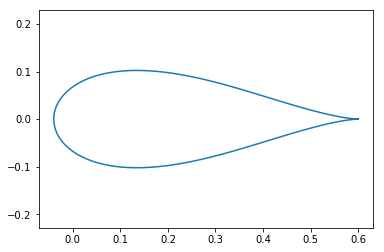

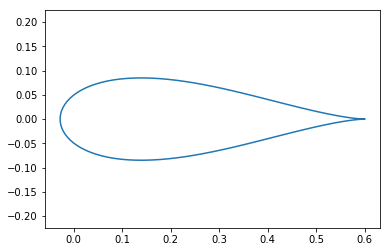

In [29]:
#
# Area to test functions
#
airfoil1 = generate_airfoil(100,-0.05, 0)
airfoil2 = generate_airfoil(100,-0.04, 0)
plot_airfoil(airfoil1)
plot_airfoil(airfoil2)

In [37]:
write_airfoil(airfoil_mutation(airfoil1, 0.1), 'data/mut')
run_xfoil('data/mut', 10, 100000000)